In [20]:
import os
import sys
# Set up paths for utility imports
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utils')

# Change working directory
os.chdir(current_dir)
sys.path.insert(0, utilities_dir)

from plotting import *   

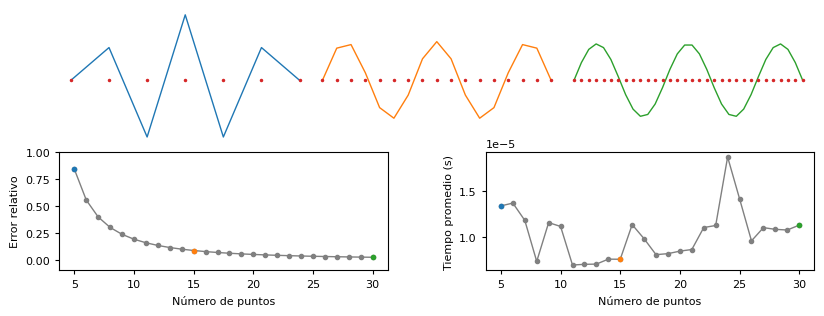

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import time

# ==========================================================
# Problema:
#     f''(x) = -(5π)^2 * sin(5πx)
#     f(0) = f(1) = 0
# Solución exacta: f(x) = sin(5πx)
# ==========================================================

def f_exacta(x):
    return np.sin(5 * np.pi * x)

def rhs(x):
    return -(5 * np.pi)**2 * np.sin(5 * np.pi * x)

# Parámetros generales
N_values = list(range(5, 31, 1))
errores_relativos = []
tiempos = []

# ==========================================================
# Calcular soluciones, errores y tiempos (promedio de 1000 corridas)
# ==========================================================
resultados = {}
n_runs = 1000  # número de repeticiones para promediar

for N in N_values:
    h = 1 / (N + 1)
    x_total = np.linspace(0, 1, N + 2)
    x_int = x_total[1:-1]

    tiempos_N = []
    for _ in range(n_runs):
        start = time.time()

        # === Incluye la construcción de la matriz y el vector ===
        A = np.zeros((N, N))
        np.fill_diagonal(A, -2)
        np.fill_diagonal(A[1:], 1)
        np.fill_diagonal(A[:, 1:], 1)
        A /= h**2

        b = rhs(x_int)

        # === Resolución del sistema ===
        f_aprox = np.linalg.solve(A, b)

        tiempos_N.append(time.time() - start)

    elapsed_mean = np.mean(tiempos_N)

    f_total = np.concatenate(([0], f_aprox, [0]))
    f_exact_total = f_exacta(x_total)
    error_rel = np.max(np.abs(f_total - f_exact_total)) / np.max(np.abs(f_exact_total))
    
    errores_relativos.append(error_rel)
    tiempos.append(elapsed_mean)
    resultados[N] = (x_total, f_total, x_int)

# ==========================================================
# Crear figura con GridSpec
# ==========================================================
fig = plt.figure(figsize=(8, 3.0))
gs = GridSpec(2, 1, height_ratios=[1.2, 1.0], figure=fig, hspace=0.0)

# === Fila superior: tres gráficas ===
gs_top = gs[0].subgridspec(1, 3, wspace=0.0)

colors = ['tab:blue', 'tab:orange', 'tab:green']
N_ejemplos = [5, 15, 30]

for i, (N, color) in enumerate(zip(N_ejemplos, colors)):
    ax = fig.add_subplot(gs_top[0, i])
    x_total, f_total, x_int = resultados[N]
    ax.plot(x_total, f_total, '-', color=color, lw=1)
    ax.plot(x_total, np.zeros_like(x_total), '.', color='tab:red', markersize=3)
    ax.set_ylim(-2.0, 2.0)
    ax.axis('off')

# === Fila inferior: dos gráficas con espacio ajustable ===
wspace_bottom = 0.3  # <<<<<< ajusta este valor para modificar el espacio horizontal
gs_bottom = gs[1].subgridspec(1, 2, wspace=wspace_bottom)

ax_errN = fig.add_subplot(gs_bottom[0, 0])
ax_errT = fig.add_subplot(gs_bottom[0, 1])

# --- Error vs número de puntos ---
ax_errN.plot(N_values, errores_relativos, '.-', lw=1, color='gray')
for N, color in zip(N_ejemplos, colors):
    idx = N_values.index(N)
    ax_errN.plot(N_values[idx], errores_relativos[idx], '.', color=color, markersize=6)
ax_errN.set_ylim(-0.1, 1.0)
ax_errN.set_xlabel('Número de puntos')
ax_errN.set_ylabel('Error relativo')

# --- Tiempo promedio (incluyendo construcción) vs número de puntos ---
ax_errT.plot(N_values, tiempos, '.-', lw=1, color='gray')
for N, color in zip(N_ejemplos, colors):
    idx = N_values.index(N)
    ax_errT.plot(N_values[idx], tiempos[idx], '.', color=color, markersize=6)
ax_errT.set_xlabel('Número de puntos')
ax_errT.set_ylabel('Tiempo promedio (s)')

plt.tight_layout()
plt.show()


In [131]:
np.linspace(10, 50, 5, dtype=int)

array([10, 20, 30, 40, 50])

/tmp/ipykernel_19545/3340041232.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


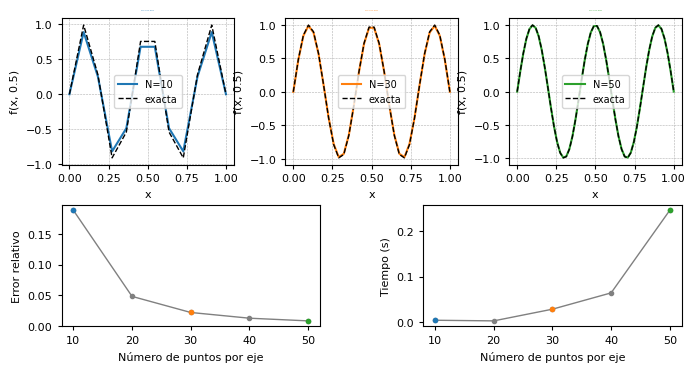

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import time

# ==========================================================
# Problema 2D:
#     ∇²f = -(5π)² sin(5πx) sin(5πy)
#     f = 0 en el borde
# Solución exacta: f(x,y) = sin(5πx) sin(5πy)
# ==========================================================

def f_exacta(x, y):
    return np.sin(5 * np.pi * x) * np.sin(5 * np.pi * y)

def rhs(x, y):
    return -2 * (5 * np.pi)**2 * np.sin(5 * np.pi * x) * np.sin(5 * np.pi * y)

# Parámetros generales
N_values = list(np.linspace(10, 50, 5, dtype=int))
errores_relativos = []
tiempos = []
resultados = {}
n_runs = 1  # promedio para tiempos

# ==========================================================
# Calcular soluciones, errores y tiempos
# ==========================================================
for N in N_values:
    h = 1 / (N + 1)
    x = np.linspace(0, 1, N + 2)
    y = np.linspace(0, 1, N + 2)
    X, Y = np.meshgrid(x, y, indexing='ij')
    X_int, Y_int = X[1:-1, 1:-1], Y[1:-1, 1:-1]

    Nx = Ny = N
    n = Nx * Ny

    # --- Construir matriz Laplaciana 2D ---
    tiempos_N = []
    for _ in range(n_runs):
        start = time.time()

        A = np.zeros((n, n))
        for i in range(n):
            A[i, i] = -4
            if i % Nx != 0:
                A[i, i - 1] = 1
            if (i + 1) % Nx != 0:
                A[i, i + 1] = 1
            if i - Nx >= 0:
                A[i, i - Nx] = 1
            if i + Nx < n:
                A[i, i + Nx] = 1
        A /= h**2

        b = rhs(X_int, Y_int).flatten()
        f_aprox = np.linalg.solve(A, b)
        tiempos_N.append(time.time() - start)

    elapsed_mean = np.mean(tiempos_N)

    f_total = np.zeros_like(X)
    f_total[1:-1, 1:-1] = f_aprox.reshape(Nx, Ny)
    f_exact_total = f_exacta(X, Y)
    error_rel = np.max(np.abs(f_total - f_exact_total)) / np.max(np.abs(f_exact_total))

    errores_relativos.append(error_rel)
    tiempos.append(elapsed_mean)
    resultados[N] = (X, Y, f_total)

# ==========================================================
# Gráficas
# ==========================================================
fig = plt.figure(figsize=(8, 4))
gs = GridSpec(2, 1, height_ratios=[1.2, 1.0], figure=fig, hspace=0.3)

# === Fila superior: slices 1D (f(x, y=0.5)) ===
gs_top = gs[0].subgridspec(1, 3, wspace=0.3)
colors = ['tab:blue', 'tab:orange', 'tab:green']
N_ejemplos = [10, 30, 50]

for i, (N, color) in enumerate(zip(N_ejemplos, colors)):
    ax = fig.add_subplot(gs_top[0, i])
    X, Y, F = resultados[N]
    # Tomamos la línea más cercana a y = 0.5
    idx_mid = np.argmin(np.abs(Y[0, :] - 0.5))
    ax.plot(X[:, idx_mid], F[:, idx_mid], color=color, lw=1.5, label=f'N={N}')
    
    # Comparar con solución exacta
    x = X[:, idx_mid]
    f_true = f_exacta(x, 0.5)
    ax.plot(x, f_true, '--', color='black', lw=1, label='exacta')
    
    ax.set_title(f'Slice y=0.5, N={N}', color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x, 0.5)')
    ax.grid(True, ls='--', lw=0.4)
    ax.legend(fontsize=7)

# === Fila inferior: error y tiempo ===
gs_bottom = gs[1].subgridspec(1, 2, wspace=0.4)
ax_errN = fig.add_subplot(gs_bottom[0, 0])
ax_errT = fig.add_subplot(gs_bottom[0, 1])

# --- Error relativo vs número de puntos ---
ax_errN.plot(N_values, errores_relativos, '.-', lw=1, color='gray')
for N, color in zip(N_ejemplos, colors):
    idx = N_values.index(N)
    ax_errN.plot(N_values[idx], errores_relativos[idx], '.', color=color, markersize=6)
ax_errN.set_xlabel('Número de puntos por eje')
ax_errN.set_ylabel('Error relativo')
#ax_errN.set_yscale('log')
 

# --- Tiempo promedio vs número de puntos ---
ax_errT.plot(N_values, tiempos, '.-', lw=1, color='gray')
for N, color in zip(N_ejemplos, colors):
    idx = N_values.index(N)
    ax_errT.plot(N_values[idx], tiempos[idx], '.', color=color, markersize=6)
ax_errT.set_xlabel('Número de puntos por eje')
ax_errT.set_ylabel('Tiempo (s)')
 

plt.tight_layout()
plt.show()
